In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Reshape the dataset and convert to float
#images = images.reshape(-1, 784)
images = images.astype(float)

#images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

images = images/255
images_test = images_test/255

print(images.shape)
print(targets.shape)

(60000, 28, 28)
(60000,)


In [ ]:
targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", 
                 "Chemise", "Sneaker", "Sac", "Bottes"]

In [ ]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [ ]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4940 - accuracy: 0.8244 - val_loss: 0.4448 - val_accuracy: 0.8400
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3687 - accuracy: 0.8637 - val_loss: 0.3521 - val_accuracy: 0.8721
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3312 - accuracy: 0.8767 - val_loss: 0.3458 - val_accuracy: 0.8738
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3071 - accuracy: 0.8850 - val_loss: 0.3303 - val_accuracy: 0.8805
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2885 - accuracy: 0.8911 - val_loss: 0.3279 - val_accuracy: 0.8844
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2763 - accuracy: 0.8965 - val_loss: 0.3283 - val_accuracy: 0.8864
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2608 - accuracy: 0.9012 - val_loss: 0.3351 - val_accuracy:

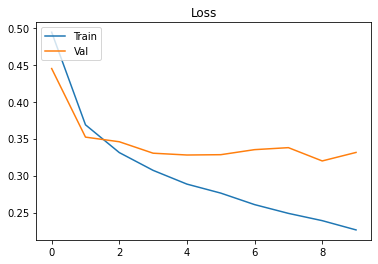

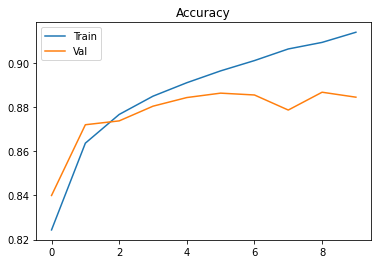

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [ ]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8767
Test Loss 0.36194702982902527
Test Accuracy 0.8766999840736389
